# Experimentando difententes métodos com OTSU para calcular o LBP

> a imagem é disposta como uma matriz no qual os pixels variam de 0 a 1.

- menor: pixels abaixo do limiar de OTSU se tornam 0;
- maior: pixels acima ou igual ao limiar de OTSU se tornam 1;
- ambos (_default_): pixels abaixo do limiar de OTSU se tornam 0, os demais se tornam 1;

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from zipfile import ZipFile
from skimage.io import imread
from img_edit import preprocessing_img

# from skimage.filters import threshold_otsu
# from skimage.feature import local_binary_pattern

# # Parâmetros do LBP
# METHOD = 'nri_uniform'
# RADIUS = 1
# N_POINTS = 8

ZIP_PATH = 'patologias_toras.zip'
TARGET_NAMES = {'normal': 0,
                'broca':1,
                'fissura': 2,
                'musgo': 3}

plt.gray()

In [2]:
path_dict = {name: [] for name in TARGET_NAMES}

with ZipFile(ZIP_PATH) as zip_file:
  for path in zip_file.namelist():
    # a pasta de cada amostra é o segundo elemento do split
    folder = path.split('/')[1]
    # Separando amostras por classe
    if '__MAC' not in path \
        and '.JPG' in path \
        and folder in TARGET_NAMES:
      path_dict[folder].append(f'./{ZIP_PATH}/{path}')

# Mostrando quantidade de amostras por classe
qtd_amostras_p_classe = []
for target in path_dict:
  n_amostras = len(path_dict[target])
  print(f'{target}: {n_amostras} amostras')

  qtd_amostras_p_classe.append(n_amostras)

N_MIN_DE_AMOSTRAS = min(qtd_amostras_p_classe)

normal: 107 amostras
broca: 90 amostras
fissura: 109 amostras
musgo: 111 amostras


In [3]:
target_list = []
angle_conf = []
crop_conf = []
color_list = []
for target_name in TARGET_NAMES:
  print(f'classe {target_name}')
  path_list = path_dict[target_name]
  path_list_slice = path_list[:N_MIN_DE_AMOSTRAS]

  count = 0
  for path in path_list_slice:
    img = imread(path)
    img_name = path.split('/')[-1].lower()

    img_prepro = preprocessing_img(img, return_metadata=True)
    new_img = img_prepro['img']

    if len(new_img) == 0:
      print(f'Erro no crop com imagem: ({img_name})')
      continue
      # pode acontecer do crop horizontal recortar a imagem toda
      # acontece erro com otsu, pula então a iteração
      # N_MIN_DE_AMOSTRAS -= 1
    if not img_prepro['conf_angle']:
      print(f'{img_name} rotacionada em {round(img_prepro["angle"], 3)} sem atender critério de satisfação.')
    
    if not img_prepro['conf_crop']:
      print(f'{img_name} não foi cortada.')

    
    
    # Salvando imagens
    plt.imsave(f'./imgs/prepro_4/{target_name}-{img_name}', arr=new_img)

    target_list.append(TARGET_NAMES[target_name])
    color_list.append(img_prepro['color'])
    angle_conf.append(img_prepro['conf_angle'])
    crop_conf.append(img_prepro['conf_crop'])
#     # Gerando arquivos csv com LBP

#     img_resolution = new_img.shape[0] * new_img.shape[1]
#     for func, amostras in func_list:
#       img_otsu = func(new_img, threshold_otsu(new_img))

#       lbp = local_binary_pattern(image=img_otsu, P=N_POINTS, R=RADIUS, method=METHOD).flatten()
      
#       arr = pd.Series(lbp).value_counts().sort_index().values
#       arr = arr / arr.max()

#       amostras.append(arr)

# for func, amostras in func_list:
#   data = pd.DataFrame(amostras)
#   data['target'] = target_list
#   data.dropna()
#   data.to_csv(f'./csvs/prepro_2_{func.__name__}.csv', index=False)
d = {'targets':target_list,
     'colors':color_list,
     'angle_conf':angle_conf,
     'crop_conf':crop_conf}
df = pd.DataFrame(data=d, dtype=int)

classe normal


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


toras610.jpg rotacionada em 4.022 sem atender critério de satisfação.
toras529.jpg rotacionada em -4.022 sem atender critério de satisfação.
toras603.jpg rotacionada em 4.022 sem atender critério de satisfação.
toras3278.jpg rotacionada em -10.056 sem atender critério de satisfação.
toras450.jpg rotacionada em -2.011 sem atender critério de satisfação.
toras515.jpg rotacionada em -1.006 sem atender critério de satisfação.
toras451.jpg rotacionada em -1.006 sem atender critério de satisfação.
toras440.jpg rotacionada em 4.022 sem atender critério de satisfação.
toras452.jpg rotacionada em -1.006 sem atender critério de satisfação.
toras959.jpg rotacionada em -2.011 sem atender critério de satisfação.
toras905.jpg rotacionada em -3.017 sem atender critério de satisfação.
toras958.jpg rotacionada em -3.017 sem atender critério de satisfação.
toras772.jpg rotacionada em -3.017 sem atender critério de satisfação.
toras775.jpg rotacionada em -4.022 sem atender critério de satisfação.
toras77

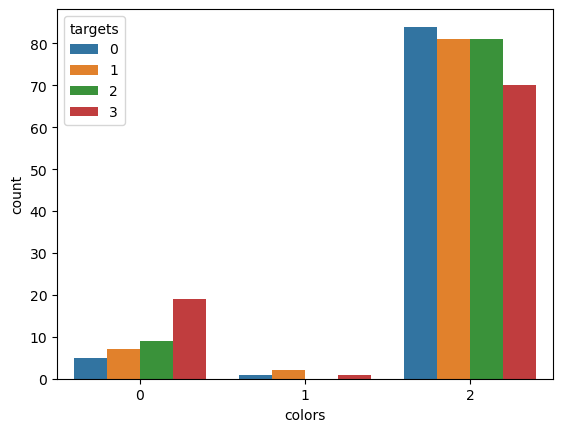

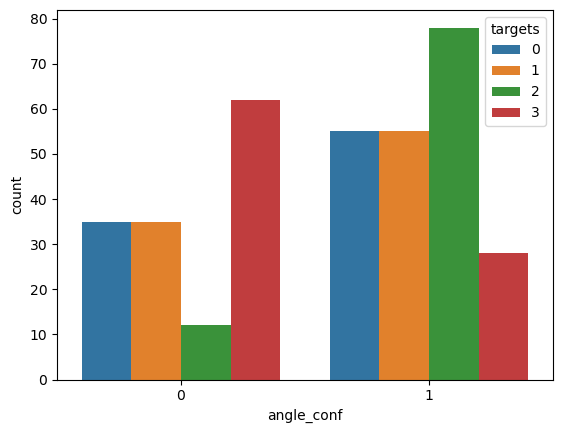

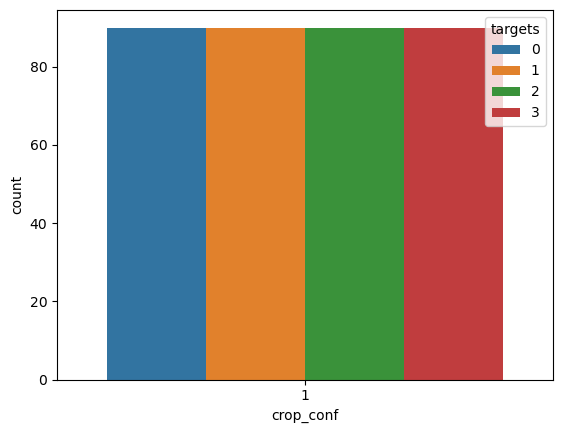

In [4]:
for col in ['colors', 'angle_conf', 'crop_conf']:
  sns.countplot(data=df, x=col, hue='targets')
  plt.show()